### Sample code for Principal Component Analysis (PCA)  

#### Import libraries  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#### Parameters  

In [2]:
csv_in = 'wine-modified.csv'

# To show all rows and columns in the results 
pd.options.display.max_columns=999
pd.options.display.max_rows=999

#### Read CSV file  

In [3]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=0, header=0)
print(df.shape)
print(df.info())
display(df.head())

(178, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic_acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity_of_ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total_phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid_phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color_intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315_of_diluted_wines  178 non-null    float64


,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#### Set data  

In [4]:
dfX = df.loc[:, 'Alcohol':]
print(dfX.shape)
display(dfX.head())

(178, 13)


,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#### Standardization  

In [5]:
sc = StandardScaler()
X_std = sc.fit_transform(dfX)

#### PCA  

In [6]:
n_pca = 7
pca = PCA(n_components=n_pca)
X_pca = pca.fit_transform(X_std)

#### PC coordinates  

In [7]:
print(X_pca.shape)
print(X_pca[:5])

(178, 7)
[[ 3.31675081 -1.44346263 -0.16573904 -0.21563119  0.69304284 -0.22388013
   0.59642655]
 [ 2.20946492  0.33339289 -2.02645737 -0.29135832 -0.25765463 -0.92712024
   0.05377561]
 [ 2.51674015 -1.0311513   0.98281867  0.72490231 -0.25103312  0.54927605
   0.42420545]
 [ 3.75706561 -2.75637191 -0.17619184  0.56798331 -0.31184159  0.114431
  -0.3833373 ]
 [ 1.00890849 -0.86983082  2.02668822 -0.40976579  0.2984575  -0.4065196
   0.44407446]]


#### Check contribution ratio  

In [8]:
print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))

[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679]
[0.36198848 0.55406338 0.66529969 0.73598999 0.80162293 0.85098116
 0.89336795]


#### Draw graph of contribution  

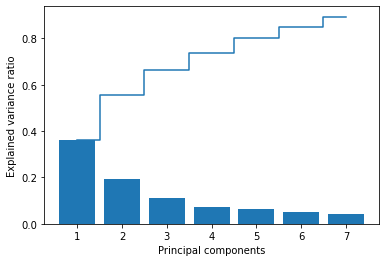

In [19]:
xx = range(1, n_pca+1)
plt.bar(xx, pca.explained_variance_ratio_)
plt.step(xx, np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

#### 2D plot 

In [10]:
ser_class = df['Class']
print(ser_class.value_counts())

2    71
1    59
3    48
Name: Class, dtype: int64


In [11]:
classes = ser_class.unique()
print(classes)
colors = ['blue', 'red', 'green']

[1 2 3]


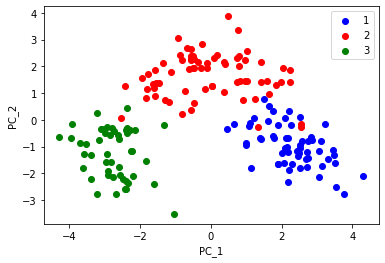

In [12]:
pca_x = X_pca[:, 0]
pca_y = X_pca[:, 1]
for i in range(len(classes)):
    cls = classes[i]
    c = colors[i]
    plt.scatter(pca_x[ser_class==cls], pca_y[ser_class==cls],
                c=c, label=cls)
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.legend()
plt.show()

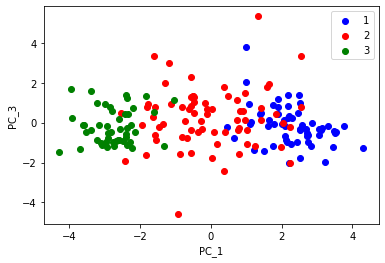

In [13]:
pca_x = X_pca[:, 0]
pca_y = X_pca[:, 2]
for i in range(len(classes)):
    cls = classes[i]
    c = colors[i]
    plt.scatter(pca_x[ser_class==cls], pca_y[ser_class==cls],
                c=c, label=cls)
plt.xlabel('PC_1')
plt.ylabel('PC_3')
plt.legend()
plt.show()

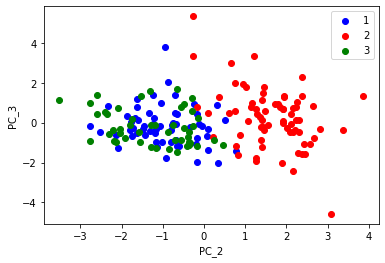

In [14]:
pca_x = X_pca[:, 1]
pca_y = X_pca[:, 2]
for i in range(len(classes)):
    cls = classes[i]
    c = colors[i]
    plt.scatter(pca_x[ser_class==cls], pca_y[ser_class==cls],
                c=c, label=cls)
plt.xlabel('PC_2')
plt.ylabel('PC_3')
plt.legend()
plt.show()

#### Draw biplot  

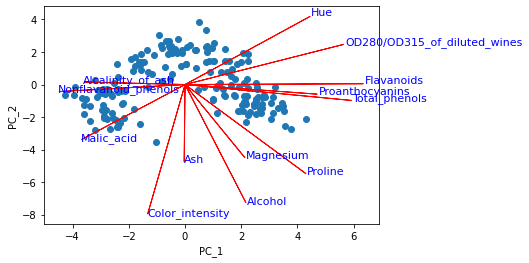

In [23]:
def biplot(X_2d, coef_2d, coef_labels=None):
    r1 = 15
    r2 = 1.01
    coef_2dT = coef_2d.T
    if coef_labels is None:
        coef_labels = range(len(coef_2dT))
    for i, coef in enumerate(coef_2dT):
        plt.arrow(0, 0, coef[0]*r1, coef[1]*r1, color='r')    
        plt.text(coef[0]*r1*r2, coef[1]*r1*r2, coef_labels[i],
                 color='b', fontsize=11)
    plt.scatter(X_2d[:,0], X_2d[:,1])
    plt.xlabel('PC_1')
    plt.ylabel('PC_2')
    return None

biplot(X_pca[:, :2], pca.components_[:2], coef_labels=dfX.columns)

##### X axis is similar to feature "Flavanoides"  
##### Y axis is similar to inverse of feature "Color_intensity"  

#### X $\sim$ Flavanoids, Y $\sim$ $-$Color_intensity    

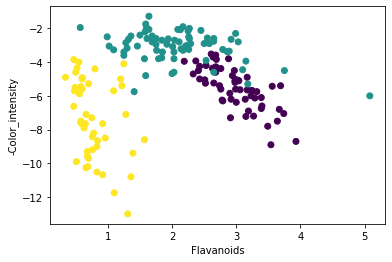

In [25]:
plt.scatter(dfX.loc[:, 'Flavanoids'],
            -dfX.loc[:, 'Color_intensity'], c=ser_class)
plt.xlabel('Flavanoids')
plt.ylabel('-Color_intensity')
plt.show()

#### Use loadings instead of PC coefficients  

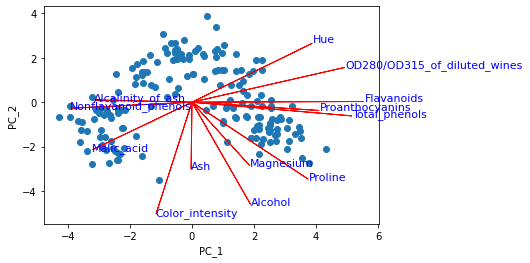

In [17]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
biplot(X_pca[:, :2], loadings[:, :2].T, coef_labels=dfX.columns)